# IMPORTANDO BIBLIOTECAS



In [4]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

import io

sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 16})

# FUNÇÕES

## Visualização

In [ ]:
# 

# EXTRAÇÃO

##  Dataframe

In [9]:
DATA_DIR = 'data/cardio.csv'

In [12]:
df = pd.read_csv(DATA_DIR, sep=';')

print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[0])

df.head()

Linhas:  70000
Colunas:  70000


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Informações sobre cada coluna:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

cardio: [Positivo (1) / Negativo (0)]

# TRANSFORMAÇÃO

Analisando se há arquivos do tipo NaN ou duplicatas no dataframe.


Arquivos NaN:

In [13]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.isna().sum()
# Apague o comentário e e comece aqui:

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Duplicatas:

In [14]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.duplicated().sum()
# Apague o comentário e e comece aqui:

0

alterando a idade para anos

In [15]:
# np.floor irá arredondar os valores
df['age'] = np.floor(df['age'] / 365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## Análises Exploratória dos Dados

### Variáveis quantitativas

#### Relação entre idade e pacientes saudáveis e cardíacos

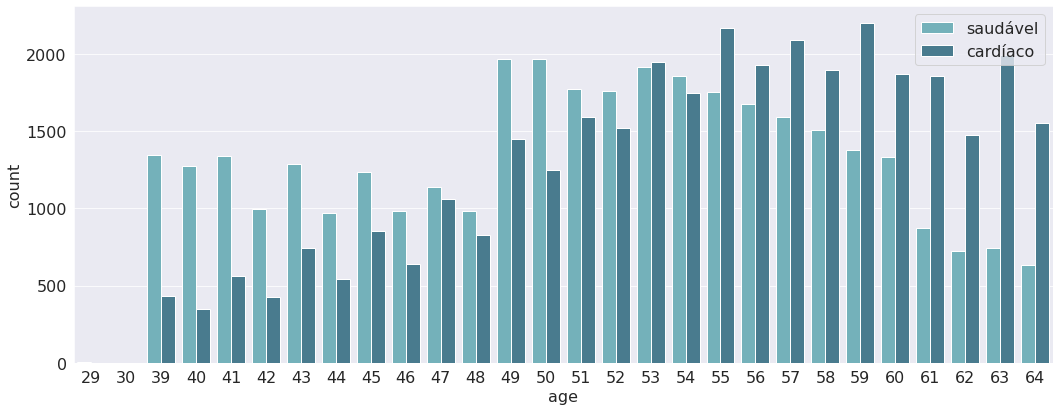

In [16]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.countplot(x='age', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
plt.tight_layout()

✅ A partir dos 53 anos as pessoas já tendem a ter complicações. Aos 55 anos os pacientes cardíacos torna-se predominante.

Além de visualizarmos apenas a distribuição, vamos criar boxplots com as variáveis do dataframe. Dessa forma podemos ter uma melhor noção sobre os extremos, os quartis e a mediana de cada coluna do dataframe - com esses valores nós podemos identificar certos comportamentos anômalos nos dados, chamados de outliers.

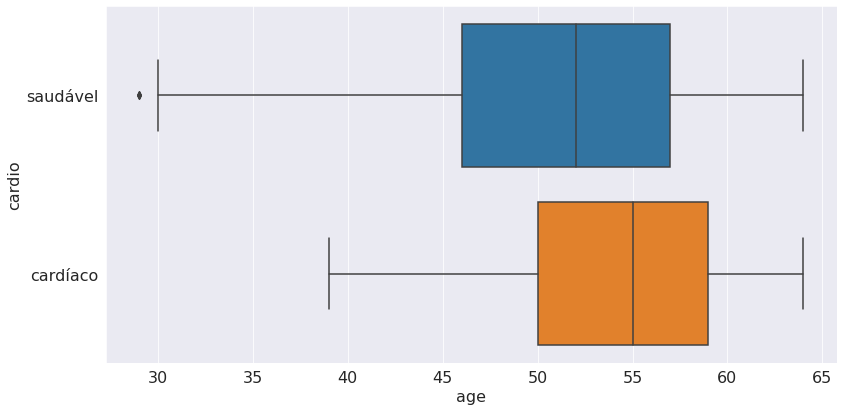

In [17]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='age', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

✅ A mediana para os cardíacos é aproximadamente 55 anos.

✅ A tendência é que 75% dos pacientes cardíacos tenham idade acima de 50 anos.

#### Relação entre pressão sanguínea e pacientes saudáveis e cardíacos

##### **PRESSÃO ALTA**

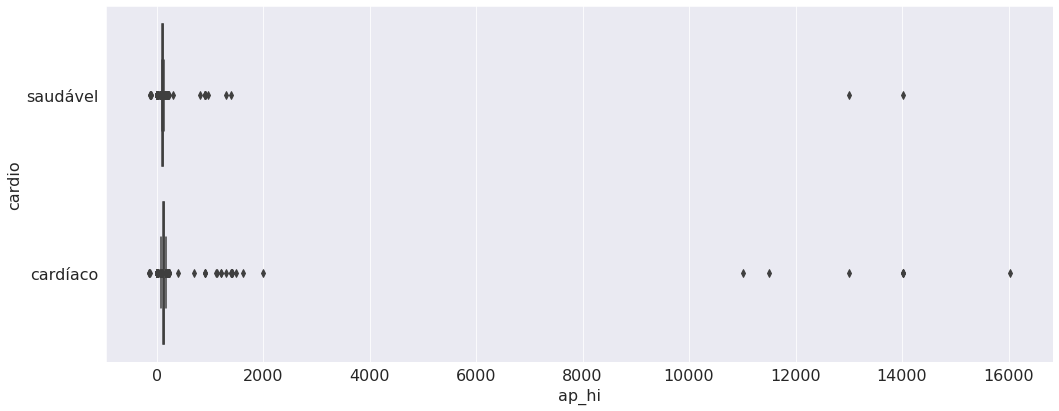

In [18]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='ap_hi', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

❗ Encontramos outliers! Vamos filtrar o valor de ap_hi para menor que 200 e avalilarmos novamente o boxplot. Para isso, utilizamos a função `df.query` do pandas e informamos que queremos 'ap_hi < 200'.

Vamos considerar valores acima dos percentis de 95% e abaixo de 2% para valores de pressão sanguínea do conjunto de dados.

In [19]:
print('98% dos valores de ap_hi estão até o valor de {}'.format(df.ap_hi.quantile(0.98)))
print('2% dos valores de ap_hi estão até o valor de {}'.format(df.ap_hi.quantile(0.02)))

98% dos valores de ap_hi estão até o valor de 170.0
2% dos valores de ap_hi estão até o valor de 100.0


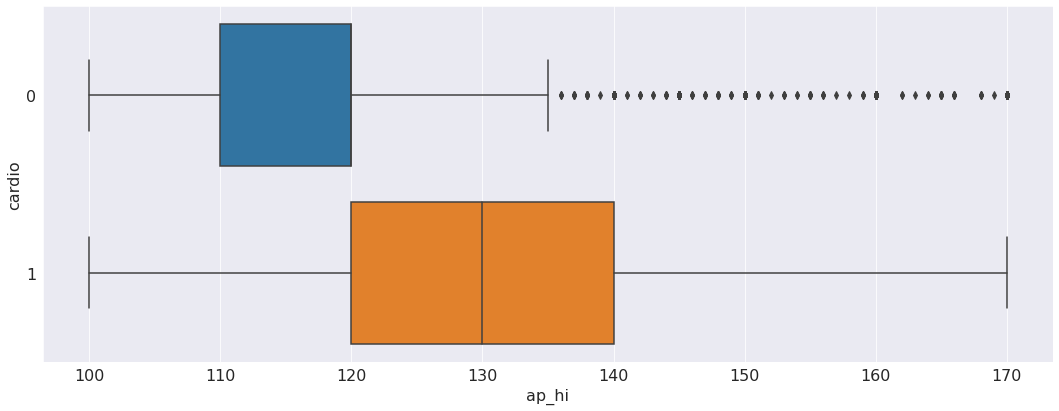

In [20]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.boxplot(x='ap_hi', y='cardio', data = df.query('(ap_hi <= 170) and (ap_hi >= 100)'), orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

Vamos remover esses dados do dataframe original

In [21]:
print('shape antes de remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape antes de remover outliers:
linhas: 70000
colunas: 13


In [22]:
# ap_hi maiores que 170 e menores que 100 serão eliminados do dataframe original
df.drop(df.query('(ap_hi > 170) | (ap_hi < 100)').index, inplace=True)

In [23]:
print('shape após remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape após remover outliers:
linhas: 67536
colunas: 13


##### PRESSÃO BAIXA

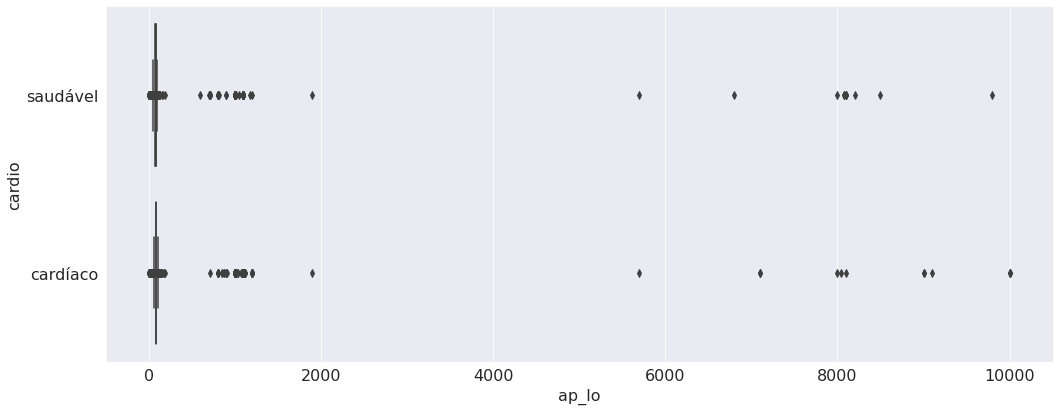

In [24]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='ap_lo', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

In [25]:
print('98% dos valores de ap_hi estão até o valor de {}'.format(df.ap_lo.quantile(0.98)))
print('2% dos valores de ap_hi estão até o valor de {}'.format(df.ap_lo.quantile(0.02)))

98% dos valores de ap_hi estão até o valor de 100.0
2% dos valores de ap_hi estão até o valor de 60.0


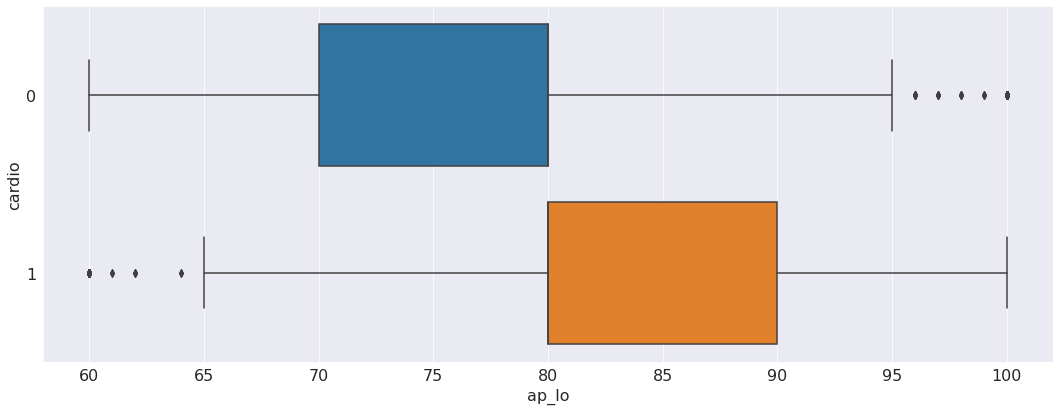

In [26]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.boxplot(x='ap_lo', y='cardio', data = df.query('(ap_lo <= 100) and (ap_lo >= 60)'), orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

In [27]:
print('shape antes de remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape antes de remover outliers:
linhas: 67536
colunas: 13


In [28]:
# ap_lo maiores que 100 e menores que 60 serão eliminados do dataframe original
df.drop(df.query('(ap_lo > 100) | (ap_lo < 60)').index, inplace=True)

In [29]:
print('shape após remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape após remover outliers:
linhas: 66193
colunas: 13


❕ questões extra que podem influênciar no desempenho do modelo em caso de ser colocado em produção:

1. Não temos informações sobre os medicamentos que os pacientes estão utilizando.

2. Problema cardíaco mais grave pode apresentar uma pressão mais baixa.

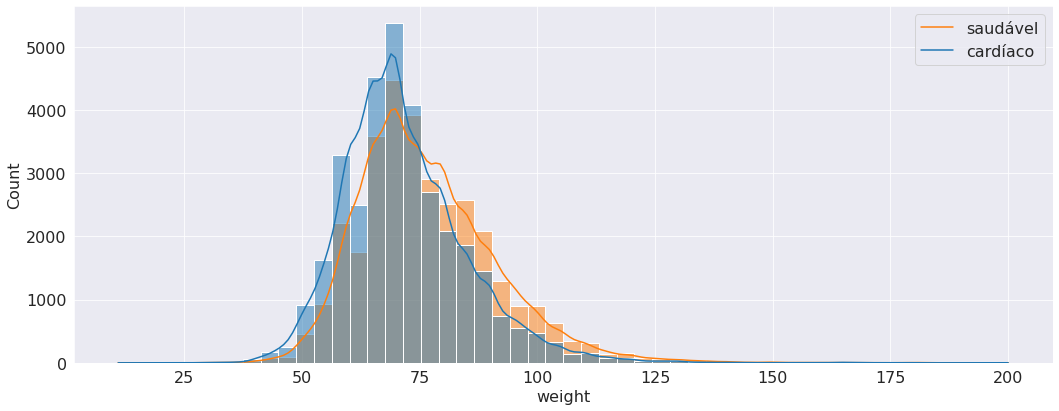

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(x='weight', hue='cardio', kde=True, data = df, bins=50);
plt.legend(['saudável', 'cardíaco'])
plt.tight_layout()

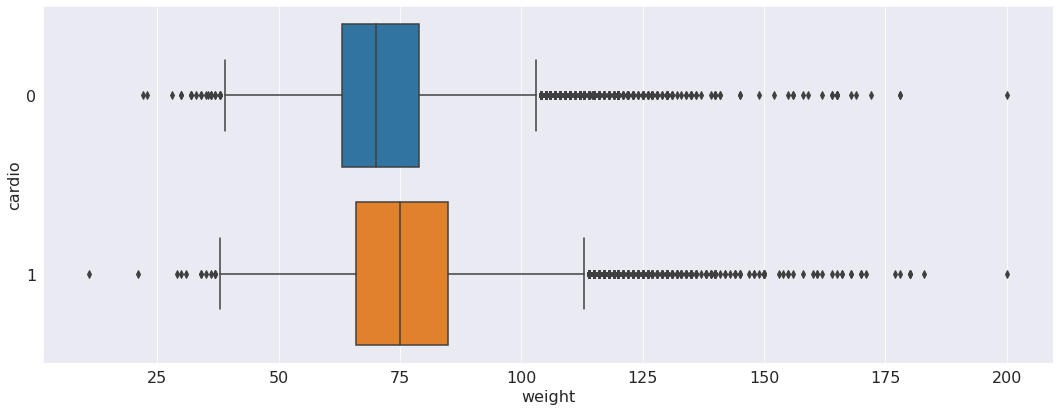

In [31]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
sns.boxplot(x='weight', y='cardio', data = df, orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'], size=16)
plt.tight_layout()

Percebe-se que há outliers. Podemos perceber que temos pesos com valores muito elevados e muito baixos - improváveis para a idade mínima da distribuição do conjunto de dados. Vamos seguir a mesma técnica que utlizamos anteriormente e remover essas outliers.

In [32]:
# idade mínima do dataset
df.age.min()

29

In [33]:
print('98% dos valores de weight estão até o valor de {}'.format(df.weight.quantile(0.98)))
print('2% dos valores de weight estão até o valor de {}'.format(df.weight.quantile(0.02)))

98% dos valores de weight estão até o valor de 109.0
2% dos valores de weight estão até o valor de 51.0


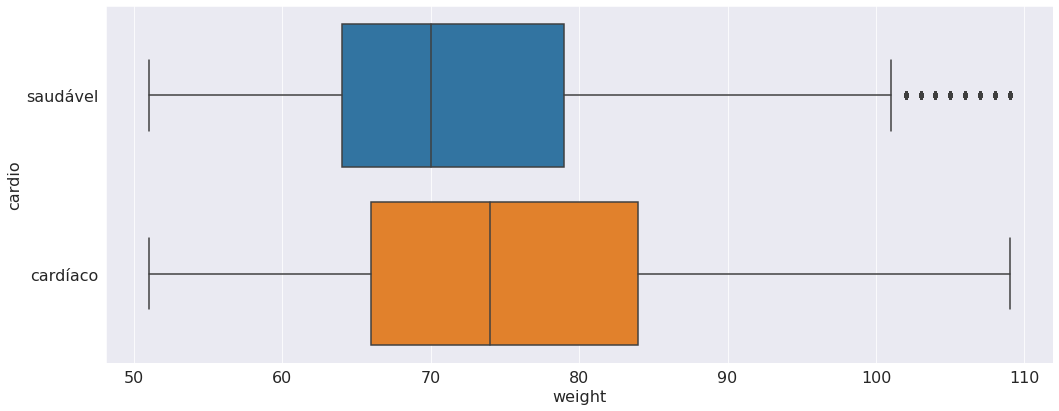

In [34]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.boxplot(x='weight', y='cardio', data = df.query('(weight <= 109) and (weight >= 51)'), orient='h');
ax.set_yticklabels(['saudável', 'cardíaco'])
plt.tight_layout()

In [35]:
print('shape antes de remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape antes de remover outliers:
linhas: 66193
colunas: 13


In [36]:
# ap_lo maiores que 100 e menores que 60 serão eliminados do dataframe original
df.drop(df.query('(weight > 109) | (weight < 51)').index, inplace=True)

In [37]:
print('shape após remover outliers:')
print('linhas:' ,df.shape[0])
print('colunas:' ,df.shape[1])

shape após remover outliers:
linhas: 63572
colunas: 13


### Variáveis qualitativas

#### Relação entre colesterol e pacientes saudáveis e cardíacos.

1: normal, 2: acima do normal, 3: bem acima do normal

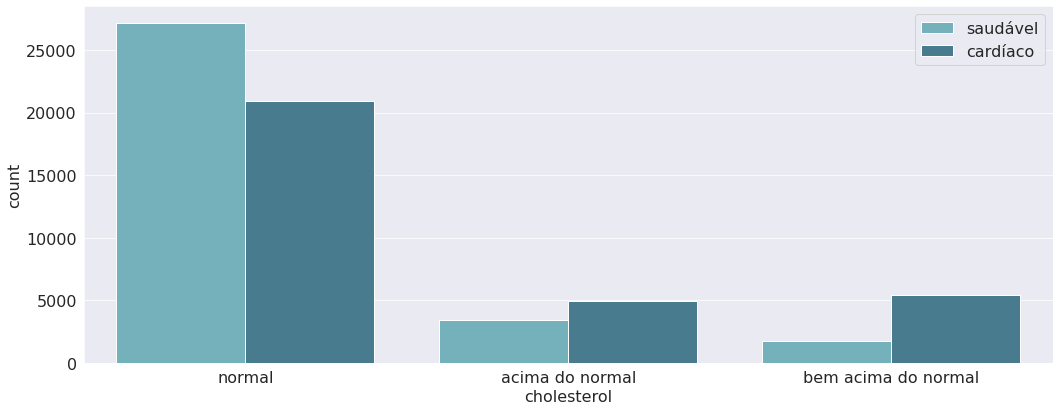

In [38]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.countplot(x='cholesterol', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
ax.set_xticklabels(['normal', 'acima do normal', 'bem acima do normal'])
plt.tight_layout()

✅ Pessoas com colesterol acima do normal tendem a apresentar problemas cardíacos.

#### Relação entre a idade média das pessoas e o índice de colesterol


Dessa vez, vamos te mostrar duas opções de avaliar essas informações específicas

In [39]:
# 1. Analisando a média de idade utilizando group by
df[['cholesterol', 'age']].groupby('cholesterol').mean()

,age
cholesterol,
1,52.381886
2,53.239102
3,55.764829


In [40]:
# 2. Analisando a média, mediana, valores mínimo e máximo de de idade utilizando group by e agg.
df[['cholesterol', 'age']].groupby('cholesterol').agg(['mean', 'median','min','max'])

age               
                  mean median min max
cholesterol                          
1            52.381886     53  29  64
2            53.239102     54  39  64
3            55.764829     57  39  64

A idade média é próxima para ambos os três níveis de colesterol propostos no dataset, entretando temos uma pequena diferença nos valores mínimos de idade. Isso quer dizer que, para esses pacientes, a idade começa a influenciar nos níveis de colesterol à partir de 29 anos.

Quais são os níveis de colesterol de pacientes menores que 39 anos?

In [41]:
df.query('age < 39')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,8850,29,1,175,59.0,120,80,1,1,0,0,1,0
22343,31922,29,2,175,92.0,100,60,1,1,0,0,1,0
30666,43842,29,1,159,59.0,120,80,1,1,0,0,1,0
55905,79749,30,1,160,59.0,110,70,1,1,0,0,1,0


Percebemos que nao há muitos pacientes, logo: pelos valores de média e mediana bem próximos, vamos considerar que a idade não está afetando o índice de colesterol para esses pacientes.

✅ Podemos perceber até aqui que a idade **pode ser** fortemente correlacionada com doenças cardiovásculares, assim como o colesterol.

#### Relação entre práticas de exercícios e pacientes cardíacos e saudáveis


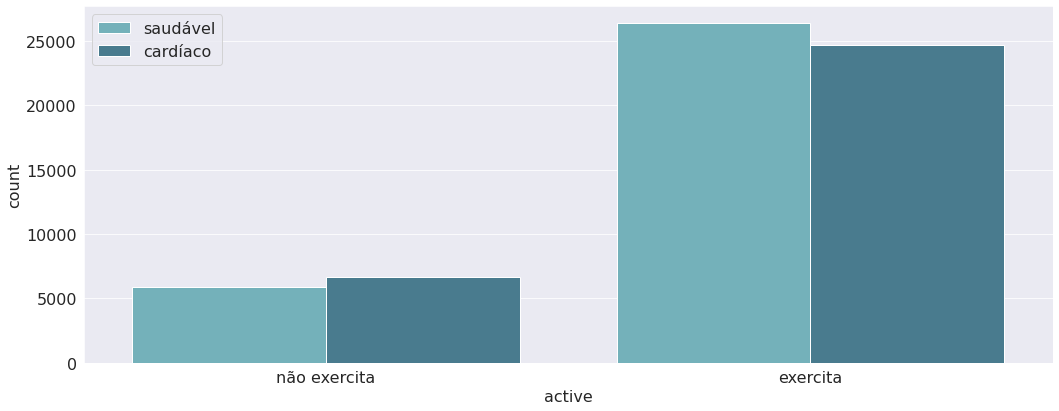

In [42]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.countplot(x='active', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
ax.set_xticklabels(['não exercita', 'exercita'])
plt.tight_layout()

#### Relação entre glucose e pacientes cardíacos e saudáveis

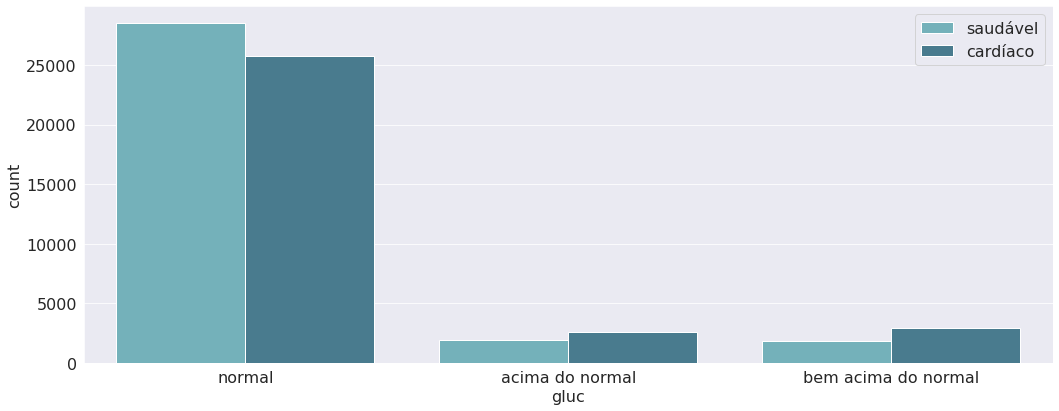

In [43]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.countplot(x='gluc', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
ax.set_xticklabels(['normal', 'acima do normal', 'bem acima do normal'])
plt.tight_layout()

#### Relação entre fumantes e pacientes cardíacos e saudáveis

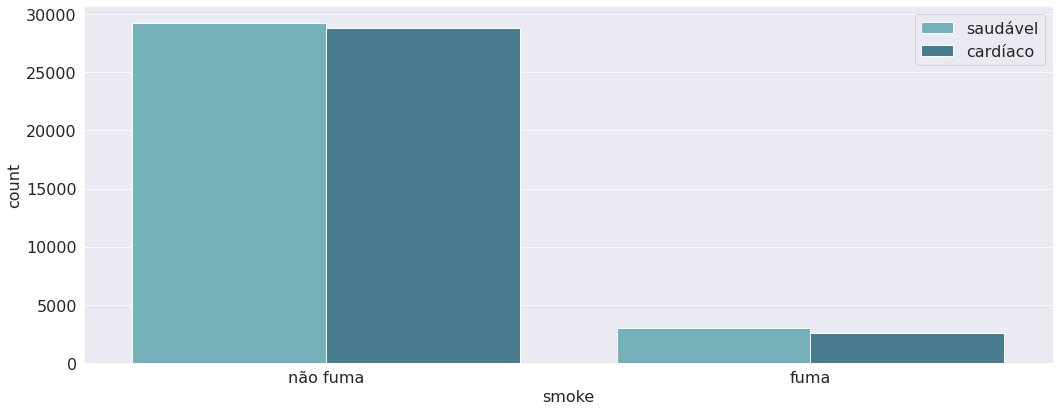

In [44]:
# analisando histogramas de variáveis quantitativas
plt.figure(figsize=(15,6))
ax = sns.countplot(x='smoke', hue='cardio', data = df, palette="GnBu_d");
plt.legend(['saudável', 'cardíaco'])
ax.set_xticklabels(['não fuma', 'fuma'])
plt.tight_layout()

### Correlação das váriaveis

In [ ]:
# corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# MODELOS DE MACHINE LEARNING

## Regressão Logística

In [70]:
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0


In [76]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['id', 'cardio' ]).to_numpy()
y = df.cardio.to_numpy()

print(X.shape)
print(y.shape)

(63572, 11)
(63572,)


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_val_scaler = scaler.transform(X_val)
X_test_scaler = scaler.transform(X_test)

print('X_train shape {}'.format(X_train_scaler.shape))
print('y_train shape {}'.format(y_train.shape))

print('X_val shape {}'.format(X_val_scaler.shape))
print('y_val shape {}'.format(y_val.shape))

print('X_test shape {}'.format(X_test_scaler.shape))
print('y_test shape {}'.format(y_test.shape))


X_train shape (40685, 11)
y_train shape (40685,)
X_val shape (12715, 11)
y_val shape (12715,)
X_test shape (10172, 11)
y_test shape (10172,)


In [78]:
from sklearn.linear_model import LogisticRegression
# instanciando a função
model = LogisticRegression(max_iter=200)

# treinando
model.fit(X_train_scaler, y_train)

# from sklearn.metrics import mean_squared_error

print(
    'score do conjunto de treinamento: {:.2f}%'.format(
        (model.score(X_train_scaler, y_train)*100))
)

print(
    'score do conjunto de validação: {:.2f}%'.format(
        (model.score(X_val_scaler, y_val)*100))
)
print(
    'score do conjunto de Teste: {:.2f}%'.format(
        model.score(X_test_scaler, y_test)*100)
    )

print(f'número de iterações: {model.n_iter_}')

score do conjunto de treinamento: 72.03%
score do conjunto de validação: 72.47%
score do conjunto de Teste: 72.75%
número de iterações: [12]


ANALISANDO AS FEATURES DE MAIOR CORRELAÇÃO NA FUNÇÃO DE DECISÃO

In [74]:
coeff_df = pd.DataFrame(
    {'features': df.drop(columns=['id', 'cardio' ]).columns}
    )
coeff_df['correlation'] = pd.Series(model.coef_[0])
coeff_df

,features,correlation
0,age,0.356854
1,gender,0.962114
2,height,0.325409
3,weight,NaN
4,ap_hi,NaN
5,ap_lo,NaN
6,cholesterol,NaN
7,gluc,NaN
8,smoke,NaN
9,alco,NaN


<AxesSubplot:xlabel='correlation', ylabel='features'>

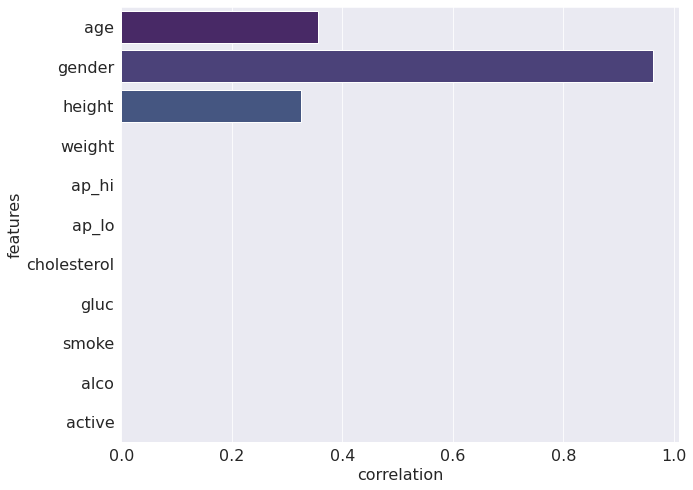

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(data=coeff_df, y='features', x='correlation', palette='viridis')

precision: quanto maior a precisão, menor a quantidade de FP;

recall:quanto maior o recall, menor a quantidade de FN;

f1-score: média harmônica entre precision e recall;

support: número de amostras para cada label.

In [53]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test_scaler), target_names=['saudável', 'cardíaco'], output_dict=True)
pd.DataFrame(report)

,saudável,cardíaco,accuracy,macro avg,weighted avg
precision,0.706759,0.754657,0.727487,0.730708,0.730369
recall,0.790617,0.662545,0.727487,0.726581,0.727487
f1-score,0.746340,0.705607,0.727487,0.725974,0.726262
support,5158.000000,5014.000000,0.727487,10172.000000,10172.000000


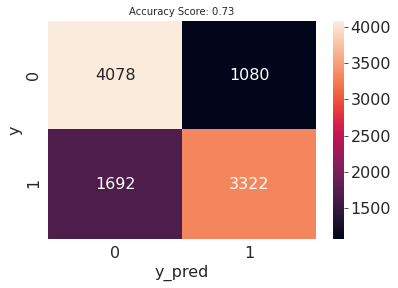

In [54]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, model.predict(X_test_scaler))

TREINANDO COM FEATURES QUE TENHAM CORRELAÇÃO > 0.3, VISANDO AUMENTAR O RECALL E REDUZIR A QUATIDADE DE FALSOS NEGATIVOS.

In [55]:
X = df[coeff_df[coeff_df.correlation > 0.2].features.values]
# X = df.drop(columns = ['gluc','smoke', 'cardio', 'height'])

y = df.cardio

print(X.shape)
print(y.shape)


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=10)

print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))

print('X_val shape {}'.format(X_val.shape))
print('y_val shape {}'.format(y_val.shape))

print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_val_scaler = scaler.transform(X_val)
X_test_scaler = scaler.transform(X_test)

# instanciando a função
model = LogisticRegression(max_iter=1000)

# treinando
model.fit(X_train_scaler, y_train)

# from sklearn.metrics import mean_squared_error

print(
    'score do conjunto de treinamento: {:.2f}%'.format(
        (model.score(X_train_scaler, y_train)*100))
)

print(
    'score do conjunto de validação: {:.2f}%'.format(
        (model.score(X_val_scaler, y_val)*100))
)
print(
    'score do conjunto de Teste: {:.2f}%'.format(
        model.score(X_test_scaler, y_test)*100)
    )

print(f'número de iterações: {model.n_iter_}')


(63572, 3)
(63572,)
X_train shape (40685, 3)
y_train shape (40685,)
X_val shape (12715, 3)
y_val shape (12715,)
X_test shape (10172, 3)
y_test shape (10172,)
score do conjunto de treinamento: 71.71%
score do conjunto de validação: 72.09%
score do conjunto de Teste: 72.27%
número de iterações: [7]


In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test_scaler), target_names=['normal', 'saudável'], output_dict=True)
pd.DataFrame(report)

,normal,saudável,accuracy,macro avg,weighted avg
precision,0.702268,0.749488,0.72267,0.725878,0.725544
recall,0.786545,0.656961,0.72267,0.721753,0.722670
f1-score,0.742021,0.700181,0.72267,0.721101,0.721397
support,5158.000000,5014.000000,0.72267,10172.000000,10172.000000


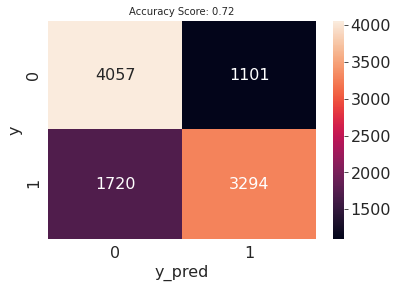

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, model.predict(X_test_scaler))

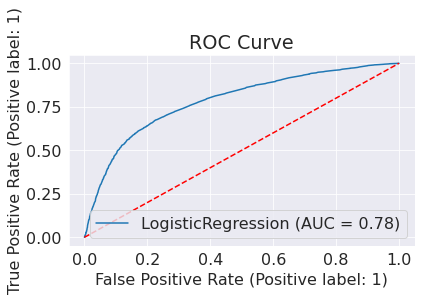

In [60]:
ax = plot_roc_curve(model, X_test_scaler, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.tight_layout()

## Linear SVC

In [66]:
from sklearn.svm import LinearSVC

X = df[coeff_df[coeff_df.correlation > 0.2].features.values]
# X = df.drop(columns = ['gluc','smoke', 'cardio', 'height'])

y = df.cardio

print(X.shape)
print(y.shape)


X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=10)

print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))

print('X_val shape {}'.format(X_val.shape))
print('y_val shape {}'.format(y_val.shape))

print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_val_scaler = scaler.transform(X_val)
X_test_scaler = scaler.transform(X_test)


# instanciando a função
model = LinearSVC(max_iter=2000)

# treinando
model.fit(X_train_scaler, y_train)

# from sklearn.metrics import mean_squared_error

print(
    'score do conjunto de treinamento: {:.2f}%'.format(
        (model.score(X_train_scaler, y_train)*100))
)

print(
    'score do conjunto de validação: {:.2f}%'.format(
        (model.score(X_val_scaler, y_val)*100))
)
print(
    'score do conjunto de Teste: {:.2f}%'.format(
        model.score(X_test_scaler, y_test)*100)
    )

(63572, 3)
(63572,)
X_train shape (40685, 3)
y_train shape (40685,)
X_val shape (12715, 3)
y_val shape (12715,)
X_test shape (10172, 3)
y_test shape (10172,)
score do conjunto de treinamento: 71.50%
score do conjunto de validação: 71.90%
score do conjunto de Teste: 72.10%


In [69]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test_scaler), target_names=['saudável', 'cardíaco'], output_dict=True)
pd.DataFrame(report)

,saudável,cardíaco,accuracy,macro avg,weighted avg
precision,0.694566,0.758432,0.720999,0.726499,0.726047
recall,0.802831,0.636817,0.720999,0.719824,0.720999
f1-score,0.744784,0.692324,0.720999,0.718554,0.718926
support,5158.000000,5014.000000,0.720999,10172.000000,10172.000000


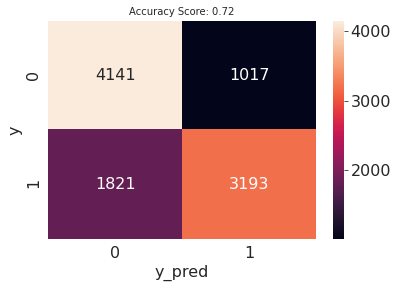

In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, model.predict(X_test_scaler))